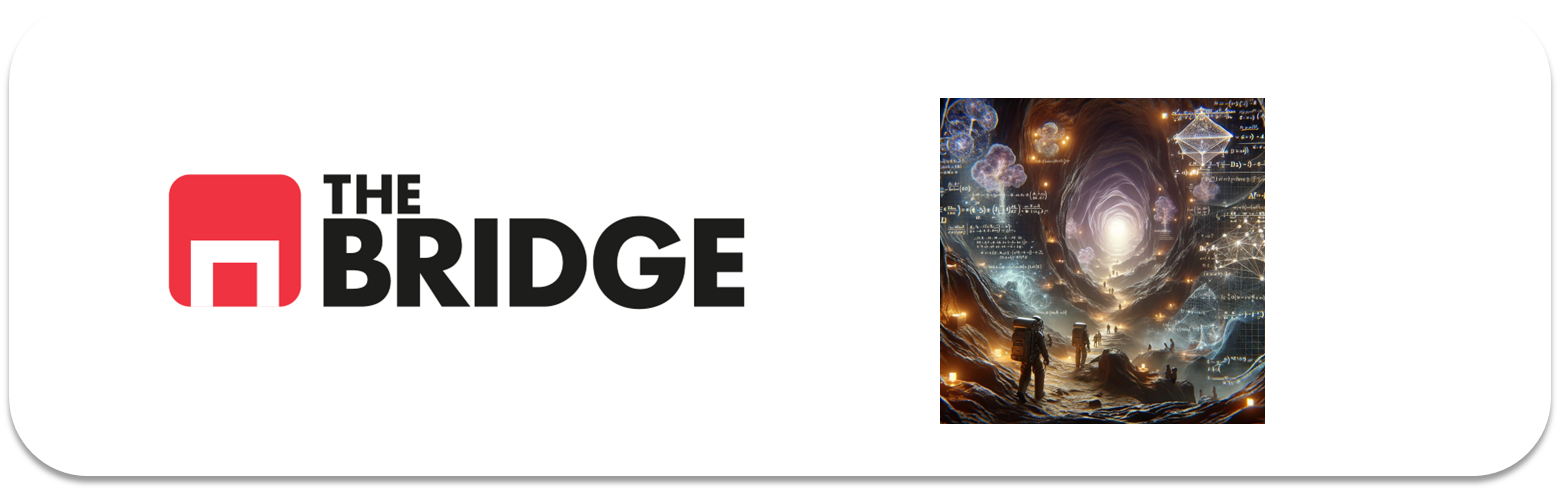

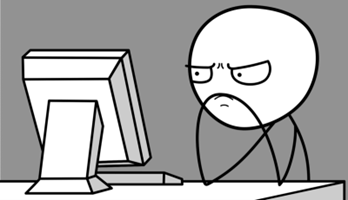

Para ejercitarte y afianzar lo aprendido sobre nuestra **Introducción a Deep Learning**, completa los siguientes ejercicios. Recuerda que necesitarás datos que están en el directorio data que acompaña al notebook (búscalo en el repositorio de ejercicios)
  
La solución a los mismos las tienes ya, intenta no mirarlos de primeras pero no dejes de hacerlo cuando hayas terminado por si te pudieran aportar.

**EN PROCESO DE CARGA**

# Bank marketing dataset - Depósito a plazo fijo

En este notebook vamos repasar un modelo que ya hicimos en anteriores ocasiones que nos permitía predecir si un individuo dependiendo de sus características, así como características de la campaña de marketing a la cual se pretende asignarlo, va a adquirir un servicio bancario (en este caso, un depósito a plazo fijo). El objetivo de este ejercicio será, mas allá de obtener un modelo preciso o hacer un análisis de datos exhaustivo, observar las posibles diferencias entre el utilizar un modelo de regresión logística o uno de MLP (multi-layer perceptron) para predecir nuestra variable categórica (sí adquiere, no adquiere).

Obtenemos los datos a partir del "*UCI Machine Learning repository*".

### *Features*:

#### Datos del cliente:

1. **age** (edad)
2. **job** (tipo de trabajo)
3. **marital** (estado marital)
4. **education** (nivel de eduación)
5. **default** (fallo en pagar una deuda)
6. **housing** (si tiene un préstamo de vivienda)
7. **loan** (si tiene un préstamo personal)
8. **balance** (balance personal)

#### Datos del último contacto de la campaña de marketing en curso:

9. **contact** (tipo de contacto)
10. **month** (último mes de contacto)
11. **day** (último día de contacto)
12. **duration** (duración de la llamada en segundos; duration = 0 significa no contactados)

#### Otros

13. **campaign** (número de contactos al cliente hechos en esta campaña)
14. **pdays** (número de días que han pasado desde que el cliente fue contactado en una campaña anterior; 999 o -1 significa que el cliente no ha sido contactado)
15. **previous** (número de contactos realizados antes de esta campaña a el cliente)
16. **poutcome** (resultado de la campaña anterior)
17. **deposit** (target)

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook

In [ ]:
# gestión de datos
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import time

# preprocesamiento
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# modelos
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier 

# evaluar modelos
from sklearn.metrics import classification_report, confusion_matrix

### Ejercicios 1

Importa los datos y echa un vistazo rápido. Selecciona la variable target y asignala a una variable "target".

In [4]:
data = pd.read_csv("./data/bank.csv")
data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,257,1,-1,0,unknown,no
11158,39,services,married,secondary,no,733,no,no,unknown,16,jun,83,4,-1,0,unknown,no
11159,32,technician,single,secondary,no,29,no,no,cellular,19,aug,156,2,-1,0,unknown,no
11160,43,technician,married,secondary,no,0,no,yes,cellular,8,may,9,2,172,5,failure,no


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


In [6]:
target = data['deposit']
target

0        yes
1        yes
2        yes
3        yes
4        yes
        ... 
11157     no
11158     no
11159     no
11160     no
11161     no
Name: deposit, Length: 11162, dtype: object

### Ejercicio 2

Haz el split en train y test y analiza el target.

In [7]:
train, test = train_test_split(data, test_size=0.2)
train

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
536,41,technician,single,tertiary,no,145,no,no,cellular,22,jul,1833,2,-1,0,unknown,yes
7901,49,admin.,single,secondary,no,7426,no,no,telephone,20,nov,65,2,-1,0,unknown,no
2587,51,technician,married,secondary,no,117,no,no,cellular,24,aug,467,2,88,4,other,yes
138,28,self-employed,single,tertiary,no,0,yes,no,unknown,26,may,1560,2,-1,0,unknown,yes
8177,48,blue-collar,married,primary,no,343,no,no,unknown,19,jun,136,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1325,36,management,single,tertiary,no,811,no,no,cellular,6,mar,229,1,-1,0,unknown,yes
4950,49,services,divorced,secondary,no,947,no,no,unknown,20,jun,808,2,-1,0,unknown,yes
10008,26,student,single,unknown,no,198,no,no,cellular,5,feb,161,1,-1,0,unknown,no
5657,33,blue-collar,married,primary,no,50,yes,no,cellular,7,may,246,2,-1,0,unknown,no


In [13]:
train['deposit'].value_counts(normalize=True)

deposit
no     0.525927
yes    0.474073
Name: proportion, dtype: float64

### Ejercicio 3

Tienes múltiples variables tipo object y algunas numéricas, en este caso quédate solo con las variables numéricas y el target. Observa las distribuciones de dichas variables numéricas

In [15]:
train.info()

features_num = data.select_dtypes(include=['int64','float']).columns.tolist()
features_num

<class 'pandas.core.frame.DataFrame'>
Index: 8929 entries, 536 to 10617
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        8929 non-null   int64 
 1   job        8929 non-null   object
 2   marital    8929 non-null   object
 3   education  8929 non-null   object
 4   default    8929 non-null   object
 5   balance    8929 non-null   int64 
 6   housing    8929 non-null   object
 7   loan       8929 non-null   object
 8   contact    8929 non-null   object
 9   day        8929 non-null   int64 
 10  month      8929 non-null   object
 11  duration   8929 non-null   int64 
 12  campaign   8929 non-null   int64 
 13  pdays      8929 non-null   int64 
 14  previous   8929 non-null   int64 
 15  poutcome   8929 non-null   object
 16  deposit    8929 non-null   object
dtypes: int64(7), object(10)
memory usage: 1.2+ MB


['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

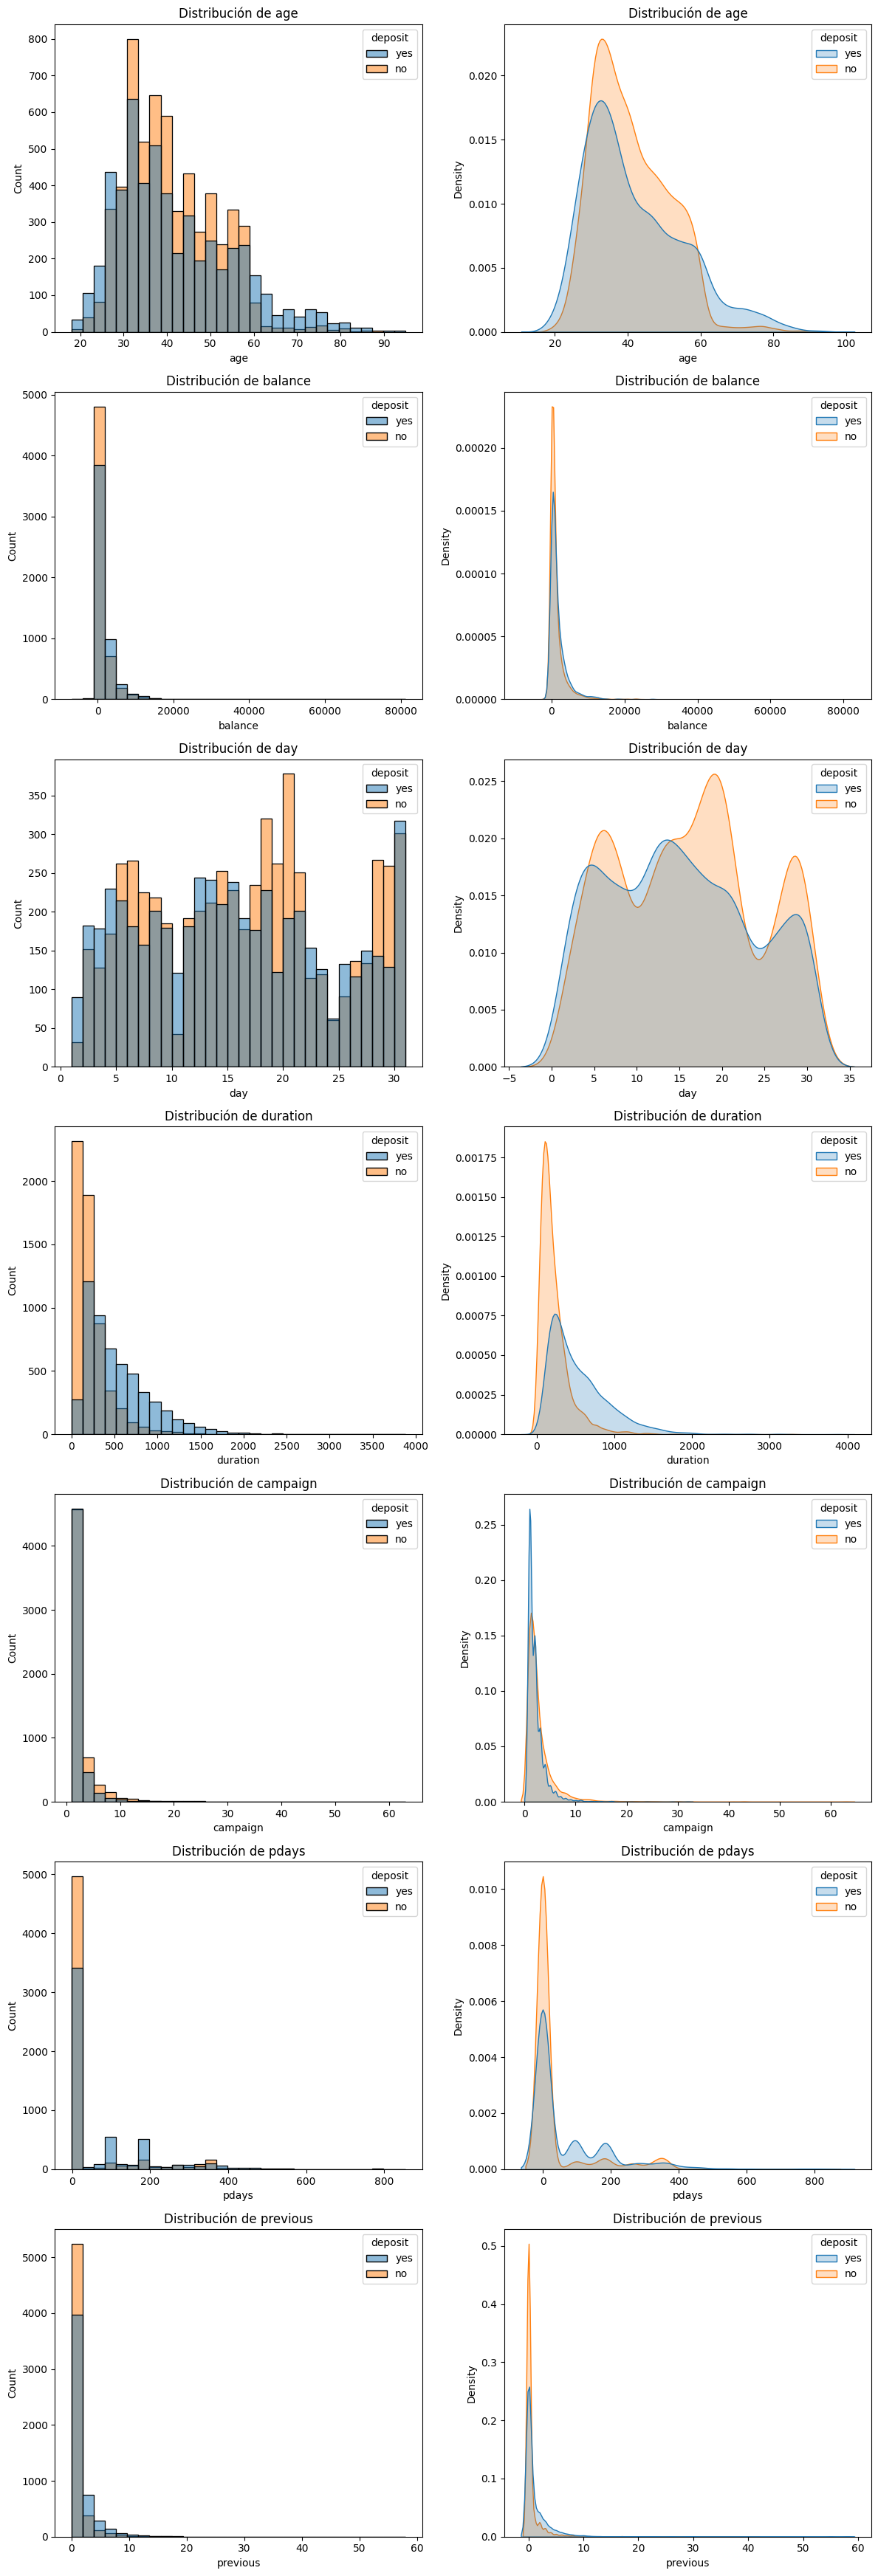

In [21]:
# Pintar las distribuciones de las variables numéricas

num_features = len(features_num)
fig, axs = plt.subplots(num_features,2, figsize=(12,5*num_features))

for i, feature in enumerate(features_num):
    sns.histplot(data=data, x=feature,hue=data['deposit'], kde=False, ax=axs[i,0],bins=30,alpha=0.5)
    axs[i,0].set_title(f"Distribución de {feature}")

    sns.kdeplot(data=data, x=feature, hue=data['deposit'], fill=True, ax=axs[i,1])
    axs[i,1].set_title(f"Distribución de {feature}")

plt.tight_layout()
plt.show()

### Ejercicio 4

A partir de las features del ejercicio 3, realiza una selección de features sencilla, utiliza la técnica que consideres conveniente y quedate con 4 features.

In [ ]:
model = RandomForestClassifier(n_estimators=100, random_state=42)

model.fit(train[features_num], train['deposit'])

importances = pd.Series(model.feature_importances_,index=features_num).sort_values(ascending=False)

print(importances)

duration    0.421330
balance     0.157731
age         0.145554
day         0.116857
pdays       0.073950
campaign    0.046217
previous    0.038362
dtype: float64


In [24]:
features_num_selected = importances[importances > 0.1].index.tolist()
features_num_selected

['duration', 'balance', 'age', 'day']

### Ejercicio 5

Crea los pares X,y para train y test y escala los datos. ¿Por qué debemos hacerlo?

In [26]:
X_train = train[features_num_selected]
y_train = train['deposit']

X_test = test[features_num_selected]
y_test = test['deposit']

In [ ]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled = pd.DataFrame(X_train_scaled, columns=features_num_selected)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=features_num_selected)

X_train_scaled.describe().T

,count,mean,std,min,25%,50%,75%,max
duration,8929.0,-4.177791e-17,1.000056,-1.068206,-0.675697,-0.335522,0.356456,8.471215
balance,8929.0,-1.591539e-17,1.000056,-2.548423,-0.427762,-0.296571,0.051038,24.253120
age,8929.0,-1.273231e-16,1.000056,-1.951848,-0.778270,-0.191481,0.646789,4.502831
day,8929.0,-7.122139e-17,1.000056,-1.738665,-0.906046,-0.073427,0.640247,1.829703


### Ejercicio 6

 Crea un modelo de regresión logistica y observa sus métricas. Además, registra su tiempo de entrenamiento y de predicciones

In [ ]:
lr = LogisticRegression()

# entrenar el modelo
lr.fit(X_train_scaled, y_train)

# predecir
y_train_pred = lr.predict(X_train_scaled)
y_test_pred = lr.predict(X_test_scaled)

# evaluar el modelo en train y test
print(f'Evaluación en train: \n {classification_report(y_train, y_train_pred)}')
print(f'Evaluación en test: \n {classification_report(y_test, y_test_pred)}')

Evaluación en train: 
               precision    recall  f1-score   support

          no       0.69      0.84      0.76      4696
         yes       0.77      0.59      0.67      4233

    accuracy                           0.72      8929
   macro avg       0.73      0.71      0.71      8929
weighted avg       0.73      0.72      0.71      8929

Evaluación en test: 
               precision    recall  f1-score   support

          no       0.71      0.85      0.77      1177
         yes       0.78      0.61      0.69      1056

    accuracy                           0.74      2233
   macro avg       0.74      0.73      0.73      2233
weighted avg       0.74      0.74      0.73      2233



### Ejercicio 7

Crea un modelo MLP, con sklearn, con dos hidden layers de 100 neuronas c/u y observa sus métricas. Además, registra su tiempo de entrenamiento y de predicciones

In [ ]:
# transformar la variable target a numérica
y_train_num = y_train.replace({'yes':1, 'no':0})
y_test_num = y_test.replace({'yes':1, 'no':0})


# definir la topologia de la red
mlp = MLPClassifier(hidden_layer_sizes=(100,100), max_iter=1000)

# entrenar el modelo
start_time_train = time.time()
mlp.fit(X_train_scaled, y_train_num)
end_time_train = time.time()
train_time = end_time_train - start_time_train
print(f'Tiempo de entrenamiento: {train_time}') 

# predecir
y_train_pred_mlp = mlp.predict(X_train_scaled)
start_time_pred_test = time.time()
y_test_pred_mlp = mlp.predict(X_test_scaled)
end_time_pred_test = time.time()
pred_time = end_time_pred_test - start_time_pred_test
print(f'Tiempo de predicción: {pred_time}')    

# evaluar el modelo en train y test
print(f'Evaluación en train: \n {classification_report(y_train_num, y_train_pred_mlp)}')
print(f'Evaluación en test: \n {classification_report(y_test_num, y_test_pred_mlp)}')

C:\Users\maria\AppData\Local\Temp\ipykernel_17548\2980662865.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y_train_num = y_train.replace({'yes':1, 'no':0})
C:\Users\maria\AppData\Local\Temp\ipykernel_17548\2980662865.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y_test_num = y_test.replace({'yes':1, 'no':0})


Tiempo de entrenamiento: 55.464672327041626
Tiempo de predicción: 0.0075109004974365234
Evaluación en train: 
               precision    recall  f1-score   support

           0       0.78      0.81      0.80      4696
           1       0.78      0.75      0.76      4233

    accuracy                           0.78      8929
   macro avg       0.78      0.78      0.78      8929
weighted avg       0.78      0.78      0.78      8929

Evaluación en test: 
               precision    recall  f1-score   support

           0       0.78      0.81      0.79      1177
           1       0.78      0.75      0.76      1056

    accuracy                           0.78      2233
   macro avg       0.78      0.78      0.78      2233
weighted avg       0.78      0.78      0.78      2233



### Ejercicio 8

Compara los dos modelos. En un caso real, ¿Con cuál modelo te quedarías? ¿Por qué?